In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [2]:
raw_data=pd.read_csv("12-houseprice.csv")

In [3]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_data=pd.read_csv(r"C:\Users\vaish\OneDrive\Desktop\Data Science\PGA\ML\Project\12-houseprice.csv",index_col=0)
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [6]:
raw_data.shape

(1460, 80)

In [7]:
for feature in ["MSSubClass","OverallQual","OverallCond"]:
    raw_data[feature] = raw_data[feature].astype("object")

In [8]:
raw_data.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [9]:
current_year= int(dt.datetime.now().year)

In [10]:
Building_age = current_year - raw_data.YearBuilt
Remodel_age = current_year - raw_data.YearRemodAdd

In [11]:
raw_data["Building_age"] = Building_age
raw_data["Remodel_age"] = Remodel_age

In [12]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Building_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,21,21
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,48,48
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,23,22
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,109,54
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,24,24


In [13]:
raw_data.shape

(1460, 82)

In [14]:
Total = raw_data.isnull().sum().sort_values(ascending=False)
Percent = (raw_data.isnull().sum()*100/raw_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis=1, keys=["Total","Percent"])
missing_data

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
...,...,...
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000


In [15]:
raw_data["Alley"].fillna("No alley access", inplace = True)

In [16]:
raw_data["MasVnrType"].fillna("None", inplace = True)

In [17]:
for col in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]:
    raw_data[col].fillna("No Basement", inplace = True)

In [18]:
raw_data["Electrical"].fillna("SBrkr", inplace = True)

In [19]:
raw_data["FireplaceQu"].fillna("No Fireplace", inplace = True)

In [20]:
for col in ["GarageType","GarageFinish","GarageQual","GarageCond"]:
    raw_data[col].fillna("No Garage", inplace = True)

In [21]:
raw_data["PoolQC"].fillna("No Pool", inplace = True)

In [22]:
raw_data["Fence"].fillna("No Fence", inplace = True)

In [23]:
raw_data["MiscFeature"].fillna("None", inplace = True)

In [24]:
raw_data["LotFrontage"].fillna(raw_data["LotFrontage"].median(), inplace=True)

In [25]:
raw_data["MasVnrArea"].fillna(0, inplace = True)

In [26]:
raw_data["GarageYrBlt"].fillna(0, inplace = True)

In [28]:
raw_data.isnull().any().sum()

0

PCA

In [29]:
df_numeric_features = raw_data.select_dtypes(include=[np.number])

df_num = df_numeric_features.drop("SalePrice", axis=1)

df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Building_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,61,0,0,0,0,0,2,2008,21,21
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,5,2007,48,48
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,42,0,0,0,0,0,9,2008,23,22
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,35,272,0,0,0,0,2,2006,109,54
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,84,0,0,0,0,0,12,2008,24,24


In [30]:
df_num_std = StandardScaler().fit_transform(df_num)

print(df_num_std)

[[-0.22087509 -0.20714171  1.05099379 ...  0.13877749 -1.05099379
  -0.87866809]
 [ 0.46031974 -0.09188637  0.15673371 ... -0.61443862 -0.15673371
   0.42957697]
 [-0.08463612  0.07347998  0.9847523  ...  0.13877749 -0.9847523
  -0.83021457]
 ...
 [-0.1754621  -0.14781027 -1.00249232 ...  1.64520971  1.00249232
  -1.02402865]
 [-0.08463612 -0.08016039 -0.70440562 ...  1.64520971  0.70440562
  -0.53949344]
 [ 0.23325479 -0.05811155 -0.20759447 ...  0.13877749  0.20759447
   0.96256569]]


In [31]:
print(df_num_std.shape)

(1460, 35)


In [32]:
cov_mat = np.cov(df_num_std.T)

print(cov_mat[0:5])

[[ 1.00068540e+00  3.04730891e-01  1.16765369e-01  8.34052140e-02
   1.78590896e-01  2.14513541e-01  4.24923323e-02  1.24183267e-01
   3.63721436e-01  4.14056133e-01  7.24376356e-02  3.74949923e-02
   3.68259672e-01  9.04047865e-02 -6.98377770e-03  1.80657531e-01
   4.72540062e-02  2.37002365e-01 -4.90803219e-03  3.20737339e-01
   2.33380490e-01  9.92638352e-02  2.69723997e-01  3.23732664e-01
   7.55938857e-02  1.37107470e-01  1.02942634e-02  6.19876851e-02
   3.76808863e-02  1.80942511e-01 -2.55539426e-04  1.04578463e-02
   6.38480650e-03 -1.16765369e-01 -8.34052140e-02]
 [ 3.04730891e-01  1.00068540e+00  1.42374034e-02  1.37978777e-02
   1.03391322e-01  2.14249877e-01  1.11245941e-01 -2.62015458e-03
   2.61011910e-01  2.99679839e-01  5.10208941e-02  4.78224538e-03
   2.63296507e-01  1.58262930e-01  4.80785014e-02  1.26117008e-01
   1.42692420e-02  1.19771944e-01 -1.77960596e-02  1.90145014e-01
   2.71550003e-01  7.26485272e-02  1.54976888e-01  1.80526403e-01
   1.71815369e-01  8.4831

In [34]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print("Eigenvalues","\n","\n", eig_val,"\n")

print("Eigenvectors","\n","\n", eig_vec,"\n")

Eigenvalues 
 
 [ 7.02177050e+00  3.31255010e+00  2.62014342e+00  1.89709198e+00
  1.49734667e+00  9.99263899e-02  1.36214989e-01  1.95108720e-01
  2.13950778e-01  3.01103966e-01  3.54408421e-01  4.01613912e-01
  1.27323863e+00  5.45571325e-01  5.57495391e-01  6.14455332e-01
  6.53106933e-01  6.65210391e-01  1.17628474e+00  7.70438353e-01
  7.98982584e-01  8.42159693e-01  8.54295919e-01  1.12605403e+00
  1.11386919e+00  9.17108768e-01  1.06812304e+00  1.04387620e+00
  9.58644771e-01  1.01349985e+00  9.80344037e-01 -1.19051344e-15
  3.34052817e-16 -1.98809747e-16  5.34799345e-17] 

Eigenvectors 
 
 [[-1.57341483e-01 -8.14685975e-02 -2.25870623e-01 ... -8.82936037e-17
  -1.68414177e-16 -2.18102117e-16]
 [-1.05975763e-01 -4.68261206e-02 -2.65177563e-01 ...  2.52950500e-16
  -1.09921199e-16 -1.36910306e-16]
 [-2.55985052e-01  2.51938290e-01  2.26447644e-01 ...  2.58570097e-01
  -2.40552466e-01  2.13520830e-01]
 ...
 [ 1.05407256e-02  3.81464928e-02 -5.52812401e-03 ...  1.15567991e-17
  -2.

In [35]:
eig_val = list(eig_val)

eig_val.sort(reverse = True)

print(eig_val)

[7.02177049941353, 3.3125501041720904, 2.6201434201098293, 1.8970919779158217, 1.4973466747555366, 1.2732386321496945, 1.17628473532543, 1.1260540287787344, 1.1138691902660682, 1.0681230423123176, 1.0438762011995237, 1.013499854773815, 0.9803440369826918, 0.9586447711070984, 0.9171087678623914, 0.8542959189393434, 0.8421596927472499, 0.7989825842753173, 0.770438352533212, 0.6652103910693307, 0.6531069328251368, 0.6144553317267819, 0.5574953911006569, 0.5455713249726812, 0.4016139120737061, 0.3544084205249465, 0.30110396633614656, 0.2139507783655342, 0.19510871979923208, 0.13621498924662623, 0.09992638992418364, 3.3405281733379634e-16, 5.3479934499330736e-17, -1.98809747461372e-16, -1.1905134401013204e-15]


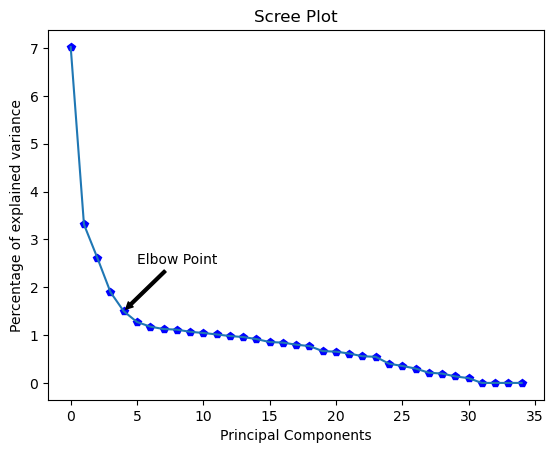

In [38]:
plt.plot(eig_val,"bp")

plt.plot(eig_val)

plt.xlabel("Principal Components")

plt.ylabel("Percentage of explained variance")
#Beautification
plt.annotate(text = "Elbow Point", xy = (4,1.5), xytext = (5,2.5), arrowprops = dict(facecolor="black", arrowstyle = "simple"))

plt.title("Scree Plot")

plt.show()

In [40]:
eigenvector = eig_vec[:,0:5]
eigenvector

array([[-0.15734148, -0.0814686 , -0.22587062, -0.10722212, -0.00752845],
       [-0.10597576, -0.04682612, -0.26517756,  0.01500761, -0.00786312],
       [-0.25598505,  0.25193829,  0.22644764,  0.03246855,  0.04820808],
       [-0.23277906,  0.15445072,  0.2753199 ,  0.01428159,  0.26832427],
       [-0.1912835 , -0.00691731, -0.04663417,  0.02642127, -0.07848375],
       [-0.14599174,  0.21408979, -0.34881371,  0.2640932 ,  0.14572962],
       [ 0.00973451,  0.03635902, -0.17643327,  0.08698812, -0.03447938],
       [-0.10716365, -0.12447427,  0.17122358, -0.56562785, -0.04965918],
       [-0.25613609,  0.11057602, -0.25506258, -0.26315384,  0.08881146],
       [-0.25253012,  0.03831097, -0.30414927, -0.28994057,  0.09159884],
       [-0.12387082, -0.38214632,  0.18281738,  0.33480834, -0.02535135],
       [ 0.02405102, -0.14573334, -0.06296919, -0.03670041,  0.18515617],
       [-0.28645931, -0.30275762, -0.07771394,  0.06143218,  0.06346053],
       [-0.08222127,  0.23681672, -0.2

In [41]:
df_pca = pd.DataFrame(df_num_std.dot(eigenvector),columns=["PC1","PC2","PC3","PC4","PC5"])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.571468,0.233699,1.586585,2.219473,0.715615
1,-0.199890,0.835867,-1.050234,-0.097077,-0.627275
2,-1.740971,0.251788,1.391157,1.637273,0.046151
3,1.470652,-1.877190,-1.515307,0.180157,-1.837106
4,-4.216754,-1.116376,0.533713,1.621483,-0.334647


In [42]:
df_pca.shape

(1460, 5)

## Below is the alternate method for the above one... Either one is enough

In [44]:
pca = PCA(n_components = 5, random_state = 0)
PrincipalComponents = pca.fit_transform(df_num_std)

In [45]:
PCA_df = pd.DataFrame(data=PrincipalComponents,columns=["PC1","PC2","PC3","PC4","PC5"])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.571352,-0.240622,-1.586777,-2.241474,0.753565
1,0.199709,-0.835527,1.042285,0.089567,-0.634687
2,1.741028,-0.250540,-1.389540,-1.627933,0.038217
3,-1.470503,1.871470,1.526313,-0.195221,-1.759654
4,4.216874,1.125024,-0.532845,-1.588267,-0.391245
